In [5]:
#import dataset
import pandas as pd
data=pd.read_csv("/content/decision_tree_regressor_dataset_v2.csv")
print(data.head())

   Age  Gender  Monthly_Income  Brand_Awareness  Store_Experience  \
0   58    Male           81476                2                 1   
1   48  Female           64811                2                 4   
2   34    Male           56208                2                 3   
3   27    Male           40150                3                 4   
4   40    Male           91180                3                 4   

   Quality_Rating  Price_Sensitivity  Purchase_Likelihood  
0               3                  3             1.932503  
1               4                  5             1.935945  
2               4                  1             2.375807  
3               5                  5             2.095519  
4               2                  2             1.964777  


In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [7]:
print(data.tail())


     Age  Gender  Monthly_Income  Brand_Awareness  Store_Experience  \
295   25  Female          128319                4                 3   
296   54  Female          112193                2                 2   
297   56    Male           56187                5                 3   
298   43  Female          132734                2                 2   
299   48  Female           27239                1                 1   

     Quality_Rating  Price_Sensitivity  Purchase_Likelihood  
295               1                  2             2.707422  
296               4                  2             3.065737  
297               5                  1             4.235243  
298               5                  3             3.136484  
299               2                  5             0.000000  


In [8]:
print(data.dtypes)

Age                      int64
Gender                  object
Monthly_Income           int64
Brand_Awareness          int64
Store_Experience         int64
Quality_Rating           int64
Price_Sensitivity        int64
Purchase_Likelihood    float64
dtype: object


In [9]:
data = pd.get_dummies(data, drop_first=True)

In [10]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

R2 Score: 0.7297910802781791


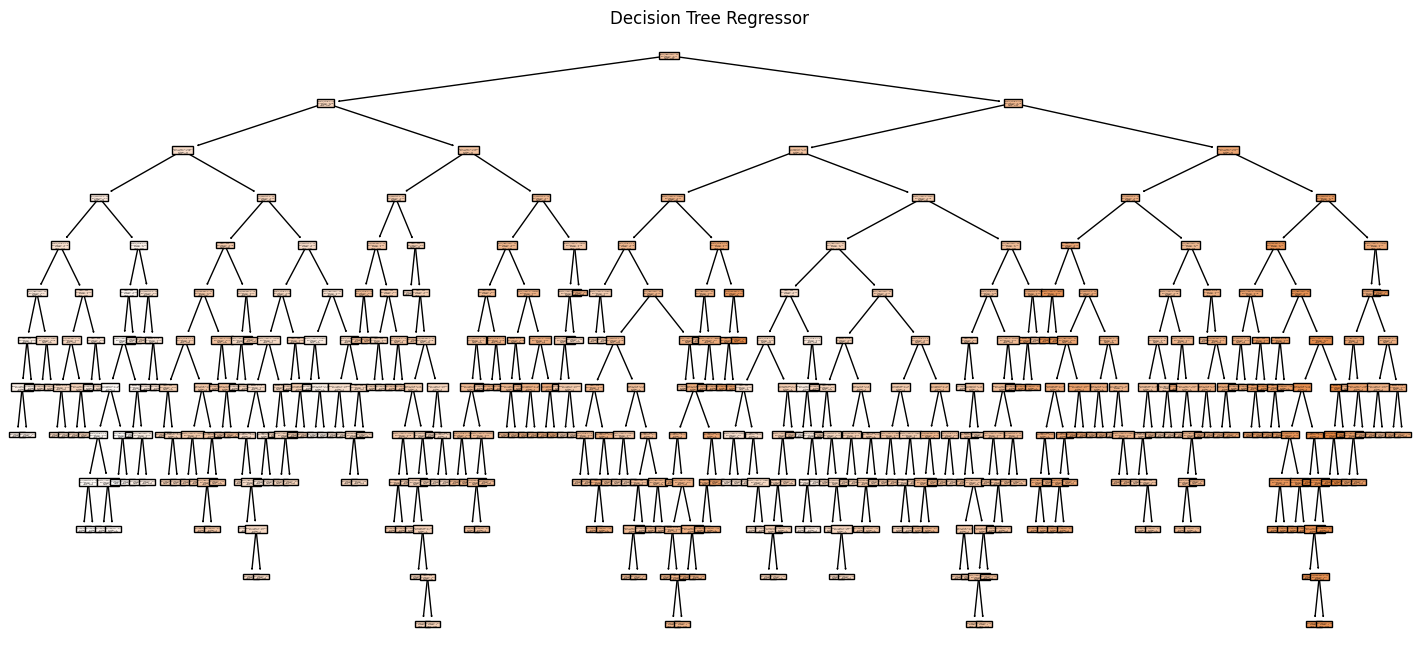

Confusion Matrix : [[15  5  0]
 [ 8  6  6]
 [ 0  3 17]]


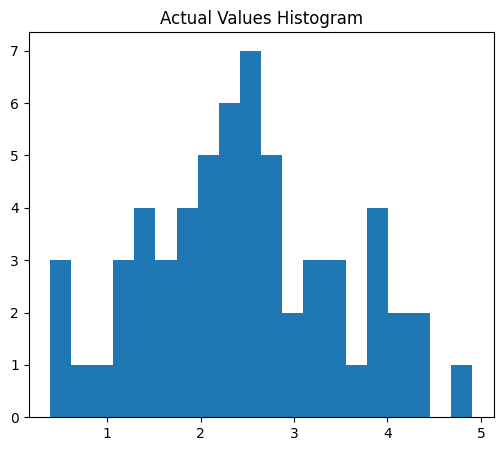

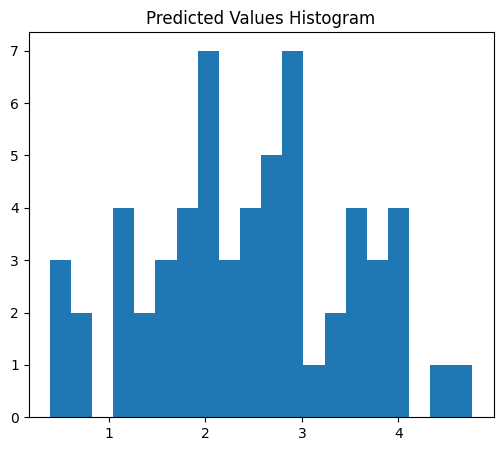

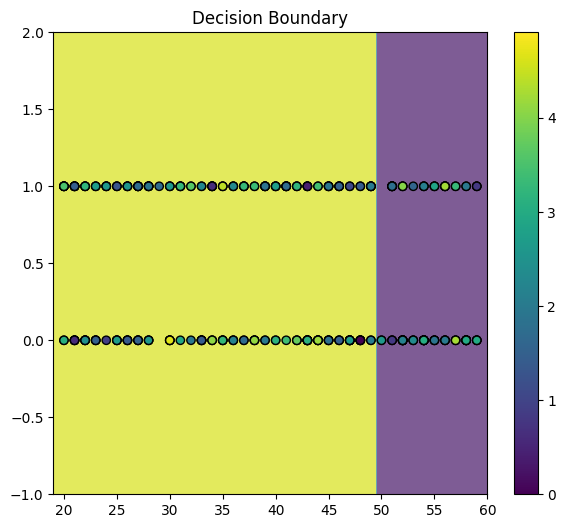

In [14]:
%pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
df=pd.read_csv("/content/decision_tree_regressor_dataset_v2.csv")
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col])
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = DecisionTreeRegressor(criterion="squared_error", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
plt.figure(figsize=(18, 8))
plot_tree(model, feature_names=df.columns[:-1], filled=True)
plt.title("Decision Tree Regressor")
plt.show()
binning = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
y_test_bin = binning.fit_transform(y_test.reshape(-1, 1)).astype(int)
y_pred_bin = binning.transform(y_pred.reshape(-1, 1)).astype(int)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print(f"Confusion Matrix : {cm}")
plt.figure(figsize=(6, 5))
plt.hist(y_test, bins=20)
plt.title("Actual Values Histogram")
plt.show()
plt.figure(figsize=(6, 5))
plt.hist(y_pred, bins=20)
plt.title("Predicted Values Histogram")
plt.show()
if X.shape[1] >= 2:
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    if X.shape[1] > 2:
        extra = np.mean(X[:, 2:], axis=0)
        grid = np.hstack([grid, np.tile(extra, (grid.shape[0], 1))])
    Z = model.predict(grid).reshape(xx.shape)
    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title("Decision Boundary")
    plt.colorbar()
    plt.show()